In [1]:
from pycaret.classification import *
import pandas as pd

In [2]:
space_df=pd.read_csv('C:/Users/arun2/Downloads/spaceship-titanic/train.csv',usecols = range(1,14))

In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
space_df['Transported'] = le.fit_transform(space_df['Transported'].astype(str))

space_df = space_df

In [4]:
space_df


,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,0
8689,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,0
8690,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,1
8691,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,0


In [5]:
space_df

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,0
8689,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,0
8690,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,1
8691,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,0


In [6]:
space_df = space_df.drop(['Name'], axis=1)

In [7]:
#space_df = space_df.drop(['Cabin'], axis=1)

In [8]:
space_df.dtypes

HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Transported       int32
dtype: object

In [9]:
space_df.isnull().sum()

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

In [10]:
space_df = space_df.dropna(subset=['HomePlanet', 'Cabin','Destination'])

In [11]:
space_df = space_df.apply(lambda x: x.fillna(x.value_counts().index[0]))
space_df

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,0
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,1
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,0
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,0
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,0
8689,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,0
8690,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,1
8691,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,0


In [12]:
space_df.isnull().sum()

HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

In [13]:
objList = space_df.select_dtypes(include = "object").columns
print (objList)

Index(['HomePlanet', 'Cabin', 'Destination'], dtype='object')


In [14]:
space_df = pd.get_dummies(space_df, columns = ['HomePlanet', 'Destination'])
print(space_df)

      CryoSleep     Cabin   Age    VIP  RoomService  FoodCourt  ShoppingMall  \
0         False     B/0/P  39.0  False          0.0        0.0           0.0   
1         False     F/0/S  24.0  False        109.0        9.0          25.0   
2         False     A/0/S  58.0   True         43.0     3576.0           0.0   
3         False     A/0/S  33.0  False          0.0     1283.0         371.0   
4         False     F/1/S  16.0  False        303.0       70.0         151.0   
...         ...       ...   ...    ...          ...        ...           ...   
8688      False    A/98/P  41.0   True          0.0     6819.0           0.0   
8689       True  G/1499/S  18.0  False          0.0        0.0           0.0   
8690      False  G/1500/S  26.0  False          0.0        0.0        1872.0   
8691      False   E/608/S  32.0  False          0.0     1049.0           0.0   
8692      False   E/608/S  44.0  False        126.0     4688.0           0.0   

         Spa  VRDeck  Transported  Home

In [15]:
space_df.isnull().sum()

CryoSleep                    0
Cabin                        0
Age                          0
VIP                          0
RoomService                  0
FoodCourt                    0
ShoppingMall                 0
Spa                          0
VRDeck                       0
Transported                  0
HomePlanet_Earth             0
HomePlanet_Europa            0
HomePlanet_Mars              0
Destination_55 Cancri e      0
Destination_PSO J318.5-22    0
Destination_TRAPPIST-1e      0
dtype: int64

In [16]:
def split_cabin(x):
  if len(str(x).split('/')) < 3:
    return ['F', '82', "S"]
  else:   
    return str(x).split('/')

In [17]:
def preprocessing(df): 
  
  df['TempCabin'] = df['Cabin'].apply(lambda x: split_cabin(x))
  df['Deck'] = df['TempCabin'].apply(lambda x: x[0])
  df['num'] = df['TempCabin'].apply(lambda x: x[1])
  df['num'] = df['num'].astype('int')
  df['Deck'] = df['Deck'].astype('category').cat.codes
  df['Side'] = df['TempCabin'].apply(lambda x: x[2])
  df['Side'] = df['Side'].astype('category').cat.codes
  df.drop(['TempCabin', 'Cabin'], axis=1,inplace=True)
  return df

In [18]:
preprocessing(space_df)

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Deck,num,Side
0,False,39.0,False,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,1,1,0,0
1,False,24.0,False,109.0,9.0,25.0,549.0,44.0,1,1,0,0,0,0,1,5,0,1
2,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0,0,0,1,0,0,0,1,0,0,1
3,False,33.0,False,0.0,1283.0,371.0,3329.0,193.0,0,0,1,0,0,0,1,0,0,1
4,False,16.0,False,303.0,70.0,151.0,565.0,2.0,1,1,0,0,0,0,1,5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,False,41.0,True,0.0,6819.0,0.0,1643.0,74.0,0,0,1,0,1,0,0,0,98,0
8689,True,18.0,False,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,1,0,6,1499,1
8690,False,26.0,False,0.0,0.0,1872.0,1.0,0.0,1,1,0,0,0,0,1,6,1500,1
8691,False,32.0,False,0.0,1049.0,0.0,353.0,3235.0,0,0,1,0,1,0,0,4,608,1


In [19]:
objList = space_df.select_dtypes(include = "object").columns
print (objList)

Index([], dtype='object')


In [20]:
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for values in objList:
    space_df[values] = le.fit_transform(space_df[values].astype(str))

space_df = space_df

In [21]:
space_df

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Deck,num,Side
0,False,39.0,False,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,1,1,0,0
1,False,24.0,False,109.0,9.0,25.0,549.0,44.0,1,1,0,0,0,0,1,5,0,1
2,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0,0,0,1,0,0,0,1,0,0,1
3,False,33.0,False,0.0,1283.0,371.0,3329.0,193.0,0,0,1,0,0,0,1,0,0,1
4,False,16.0,False,303.0,70.0,151.0,565.0,2.0,1,1,0,0,0,0,1,5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,False,41.0,True,0.0,6819.0,0.0,1643.0,74.0,0,0,1,0,1,0,0,0,98,0
8689,True,18.0,False,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,1,0,6,1499,1
8690,False,26.0,False,0.0,0.0,1872.0,1.0,0.0,1,1,0,0,0,0,1,6,1500,1
8691,False,32.0,False,0.0,1049.0,0.0,353.0,3235.0,0,0,1,0,1,0,0,4,608,1


In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
space_df['CryoSleep'] = le.fit_transform(space_df['CryoSleep'].astype(str))

space_df = space_df

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
space_df['VIP'] = le.fit_transform(space_df['VIP'].astype(str))

space_df = space_df

In [24]:
space_df

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Deck,num,Side
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,1,1,0,0
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,1,0,0,0,0,1,5,0,1
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,0,1,0,0,0,1,0,0,1
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,0,1,0,0,0,1,0,0,1
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,1,0,0,0,0,1,5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0,0,1,0,1,0,0,0,98,0
8689,1,18.0,0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,1,0,6,1499,1
8690,0,26.0,0,0.0,0.0,1872.0,1.0,0.0,1,1,0,0,0,0,1,6,1500,1
8691,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,0,0,1,0,1,0,0,4,608,1


In [25]:
clf1 = setup(data = space_df, 
             target = 'Transported',
             numeric_imputation = 'mean')

,Description,Value
0,Session id,6504
1,Target,Transported
2,Target type,Binary
3,Original data shape,"(8125, 18)"
4,Transformed data shape,"(8125, 18)"
5,Transformed train set shape,"(5687, 18)"
6,Transformed test set shape,"(2438, 18)"
7,Numeric features,17
8,Preprocess,True
9,Imputation type,simple


In [26]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8115,0.9025,0.8026,0.8194,0.8109,0.6230,0.6233,0.7290
gbc,Gradient Boosting Classifier,0.8031,0.8970,0.8236,0.7934,0.8080,0.6060,0.6068,0.8860
rf,Random Forest Classifier,0.8025,0.8835,0.7632,0.8312,0.7956,0.6053,0.6075,1.1160
xgboost,Extreme Gradient Boosting,0.8025,0.8966,0.7887,0.8135,0.8008,0.6051,0.6056,0.9350
et,Extra Trees Classifier,0.8013,0.8716,0.7642,0.8281,0.7946,0.6028,0.6049,0.9630
ada,Ada Boost Classifier,0.7971,0.8833,0.8257,0.7835,0.8039,0.5940,0.5951,0.7500
lr,Logistic Regression,0.7953,0.8775,0.8187,0.7844,0.8010,0.5905,0.5913,1.2450
ridge,Ridge Classifier,0.7704,0.0000,0.7185,0.8047,0.7590,0.5410,0.5443,0.7490
lda,Linear Discriminant Analysis,0.7702,0.8567,0.7185,0.8044,0.7589,0.5407,0.5439,0.6390
knn,K Neighbors Classifier,0.7614,0.8166,0.7936,0.7483,0.7701,0.5225,0.5238,0.6410


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=6504, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [27]:
lightgbm  = create_model('lightgbm')    

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8207,0.9064,0.8084,0.8315,0.8198,0.6415,0.6418
1,0.8243,0.9089,0.8223,0.8281,0.8252,0.6485,0.6485
2,0.8014,0.8969,0.7909,0.8107,0.8007,0.6029,0.6030
3,0.8313,0.9182,0.8217,0.8393,0.8304,0.6626,0.6627
4,0.8049,0.8997,0.7727,0.8277,0.7993,0.6100,0.6113
5,0.8137,0.8997,0.8042,0.8214,0.8127,0.6274,0.6276
6,0.8137,0.8964,0.8042,0.8214,0.8127,0.6274,0.6276
7,0.8011,0.9056,0.7902,0.8100,0.8000,0.6022,0.6023
8,0.7835,0.8920,0.7937,0.7801,0.7868,0.5668,0.5669


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [28]:
tuned_lightgbm = tune_model(lightgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7891,0.8902,0.8014,0.7850,0.7931,0.5781,0.5782
1,0.8102,0.8964,0.8258,0.8034,0.8144,0.6203,0.6205
2,0.8102,0.8848,0.8084,0.8140,0.8112,0.6204,0.6204
3,0.8155,0.9046,0.8217,0.8131,0.8174,0.6309,0.6309
4,0.8014,0.8968,0.8042,0.8014,0.8028,0.6028,0.6028
5,0.8172,0.8974,0.8147,0.8204,0.8175,0.6344,0.6345
6,0.8067,0.8882,0.8322,0.7933,0.8123,0.6132,0.6140
7,0.8116,0.8999,0.8287,0.8034,0.8158,0.6231,0.6234
8,0.7782,0.8809,0.8077,0.7649,0.7857,0.5561,0.5570


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [29]:
final_model = finalize_model(lightgbm)


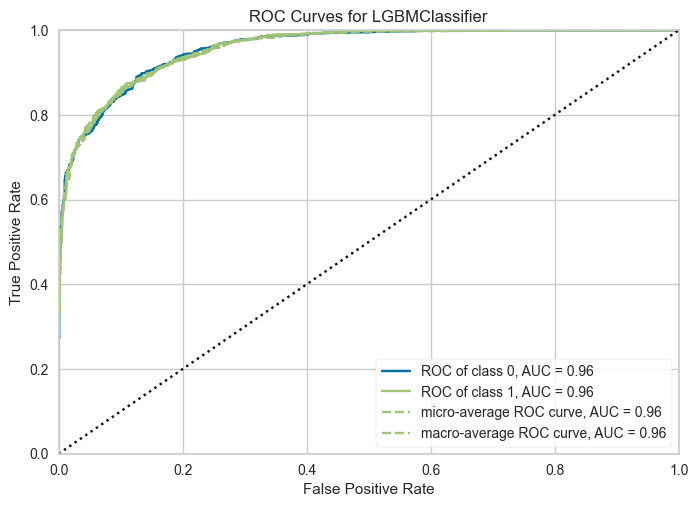

In [30]:
plot_model(final_model, plot='auc')

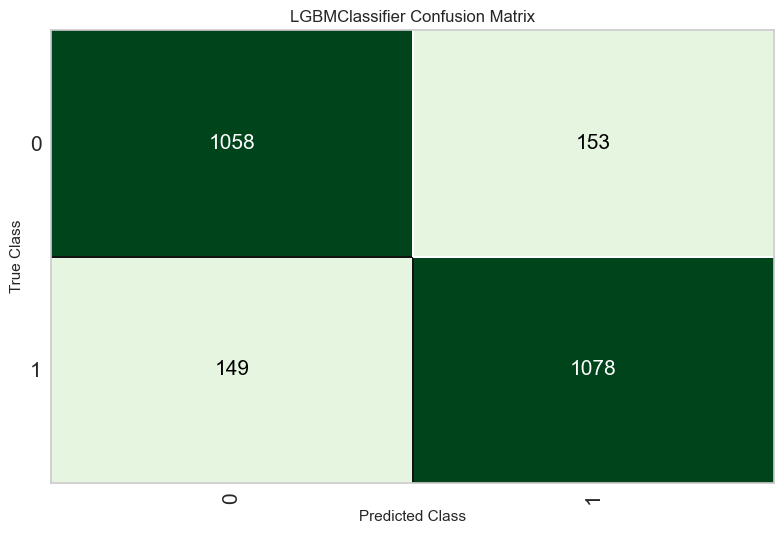

In [31]:
plot_model(final_model, plot='confusion_matrix')


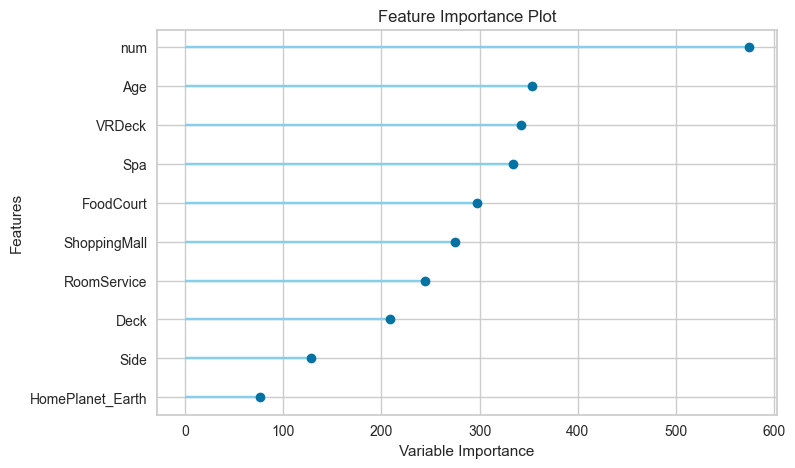

In [32]:
plot_model(estimator = final_model, plot = 'feature')

In [33]:
predict_model(final_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8761,0.9584,0.8786,0.8757,0.8771,0.7522,0.7522


,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Deck,num,Side,Transported,prediction_label,prediction_score
5408,0,21.0,0,0.0,128.0,209.0,4.0,383.0,1,0,0,0,0,1,5,1102,1,0,0,0.6339
2906,0,32.0,0,1087.0,0.0,71.0,0.0,0.0,0,0,1,0,0,1,5,591,1,0,0,0.8803
6982,0,21.0,0,550.0,0.0,61.0,4.0,5.0,1,0,0,0,0,1,6,1204,1,0,0,0.8204
2695,0,44.0,0,0.0,351.0,0.0,3.0,3447.0,0,1,0,0,0,1,1,89,0,0,0,0.9876
6427,0,9.0,0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,1,5,1411,0,1,0,0.5816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8479,0,26.0,0,887.0,6.0,15.0,148.0,0.0,0,0,1,0,0,1,3,276,1,0,0,0.9479
7313,1,23.0,0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,1,0,6,1268,1,1,1,0.7091
7317,0,16.0,0,1095.0,0.0,54.0,0.0,0.0,0,0,1,0,0,1,5,1626,0,0,0,0.9181
6753,0,24.0,0,0.0,4155.0,0.0,1368.0,42.0,0,1,0,0,0,1,1,237,0,0,0,0.8086


In [37]:
space_df_test =pd.read_csv('C:/Users/arun2/Downloads/spaceship-titanic/test.csv',usecols = range(1,13))
space_df_test.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [38]:
space_df_test.isnull().sum()

HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [39]:
space_df_test = space_df_test.dropna(subset=['HomePlanet', 'Cabin','Destination'])

In [40]:
space_df_test.isnull().sum()

HomePlanet        0
CryoSleep        84
Cabin             0
Destination       0
Age              82
VIP              85
RoomService      81
FoodCourt       101
ShoppingMall     89
Spa              92
VRDeck           72
Name             90
dtype: int64

In [41]:
space_df_test = space_df_test.drop(['Name'], axis=1)

In [42]:
space_df_test = space_df_test.apply(lambda x: x.fillna(x.value_counts().index[0]))
space_df_test

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0
1,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0
2,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0
3,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0
4,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4270,Mars,False,D/278/S,TRAPPIST-1e,43.0,False,47.0,0.0,3851.0,0.0,0.0
4271,Earth,False,F/1796/S,TRAPPIST-1e,40.0,False,0.0,865.0,0.0,3.0,0.0
4272,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0
4274,Mars,True,D/296/P,55 Cancri e,18.0,False,0.0,0.0,0.0,0.0,0.0


In [43]:
objList = space_df_test.select_dtypes(include = "object").columns
print (objList)

Index(['HomePlanet', 'Cabin', 'Destination'], dtype='object')


In [44]:
space_df_test = pd.get_dummies(space_df_test, columns = ['HomePlanet', 'Destination'])
print(space_df_test)

      CryoSleep     Cabin   Age    VIP  RoomService  FoodCourt  ShoppingMall  \
0          True     G/3/S  27.0  False          0.0        0.0           0.0   
1         False     F/4/S  19.0  False          0.0        9.0           0.0   
2          True     C/0/S  31.0  False          0.0        0.0           0.0   
3         False     C/1/S  38.0  False          0.0     6652.0           0.0   
4         False     F/5/S  20.0  False         10.0        0.0         635.0   
...         ...       ...   ...    ...          ...        ...           ...   
4270      False   D/278/S  43.0  False         47.0        0.0        3851.0   
4271      False  F/1796/S  40.0  False          0.0      865.0           0.0   
4272       True  G/1496/S  34.0  False          0.0        0.0           0.0   
4274       True   D/296/P  18.0  False          0.0        0.0           0.0   
4276       True  G/1498/S  43.0  False          0.0        0.0           0.0   

         Spa  VRDeck  HomePlanet_Earth 

In [45]:
#space_df_test = space_df_test.drop(['Cabin'], axis=1)

In [46]:
objList = space_df_test.select_dtypes(include = "object").columns
print (objList)

Index(['Cabin'], dtype='object')


In [47]:
preprocessing(space_df_test)

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Deck,num,Side
0,True,27.0,False,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,1,6,3,1
1,False,19.0,False,0.0,9.0,0.0,2823.0,0.0,1,0,0,0,0,1,5,4,1
2,True,31.0,False,0.0,0.0,0.0,0.0,0.0,0,1,0,1,0,0,2,0,1
3,False,38.0,False,0.0,6652.0,0.0,181.0,585.0,0,1,0,0,0,1,2,1,1
4,False,20.0,False,10.0,0.0,635.0,0.0,0.0,1,0,0,0,0,1,5,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4270,False,43.0,False,47.0,0.0,3851.0,0.0,0.0,0,0,1,0,0,1,3,278,1
4271,False,40.0,False,0.0,865.0,0.0,3.0,0.0,1,0,0,0,0,1,5,1796,1
4272,True,34.0,False,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,1,6,1496,1
4274,True,18.0,False,0.0,0.0,0.0,0.0,0.0,0,0,1,1,0,0,3,296,0


In [49]:
space_df_test

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Deck,num,Side
0,True,27.0,False,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,1,6,3,1
1,False,19.0,False,0.0,9.0,0.0,2823.0,0.0,1,0,0,0,0,1,5,4,1
2,True,31.0,False,0.0,0.0,0.0,0.0,0.0,0,1,0,1,0,0,2,0,1
3,False,38.0,False,0.0,6652.0,0.0,181.0,585.0,0,1,0,0,0,1,2,1,1
4,False,20.0,False,10.0,0.0,635.0,0.0,0.0,1,0,0,0,0,1,5,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4270,False,43.0,False,47.0,0.0,3851.0,0.0,0.0,0,0,1,0,0,1,3,278,1
4271,False,40.0,False,0.0,865.0,0.0,3.0,0.0,1,0,0,0,0,1,5,1796,1
4272,True,34.0,False,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,1,6,1496,1
4274,True,18.0,False,0.0,0.0,0.0,0.0,0.0,0,0,1,1,0,0,3,296,0


In [50]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
space_df_test['CryoSleep'] = le.fit_transform(space_df_test['CryoSleep'].astype(str))

space_df_test = space_df_test

In [51]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
space_df_test['VIP'] = le.fit_transform(space_df_test['VIP'].astype(str))

space_df_test = space_df_test

In [52]:
space_df_test

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Deck,num,Side
0,1,27.0,0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,1,6,3,1
1,0,19.0,0,0.0,9.0,0.0,2823.0,0.0,1,0,0,0,0,1,5,4,1
2,1,31.0,0,0.0,0.0,0.0,0.0,0.0,0,1,0,1,0,0,2,0,1
3,0,38.0,0,0.0,6652.0,0.0,181.0,585.0,0,1,0,0,0,1,2,1,1
4,0,20.0,0,10.0,0.0,635.0,0.0,0.0,1,0,0,0,0,1,5,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4270,0,43.0,0,47.0,0.0,3851.0,0.0,0.0,0,0,1,0,0,1,3,278,1
4271,0,40.0,0,0.0,865.0,0.0,3.0,0.0,1,0,0,0,0,1,5,1796,1
4272,1,34.0,0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,1,6,1496,1
4274,1,18.0,0,0.0,0.0,0.0,0.0,0.0,0,0,1,1,0,0,3,296,0


In [53]:
test_preds = predict_model(final_model, space_df_test)
test_preds

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Deck,num,Side,prediction_label,prediction_score
0,1,27.0,0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,1,6,3,1,1,0.5620
1,0,19.0,0,0.0,9.0,0.0,2823.0,0.0,1,0,0,0,0,1,5,4,1,0,0.9720
2,1,31.0,0,0.0,0.0,0.0,0.0,0.0,0,1,0,1,0,0,2,0,1,1,0.9645
3,0,38.0,0,0.0,6652.0,0.0,181.0,585.0,0,1,0,0,0,1,2,1,1,1,0.9943
4,0,20.0,0,10.0,0.0,635.0,0.0,0.0,1,0,0,0,0,1,5,5,1,1,0.6369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4270,0,43.0,0,47.0,0.0,3851.0,0.0,0.0,0,0,1,0,0,1,3,278,1,1,0.9669
4271,0,40.0,0,0.0,865.0,0.0,3.0,0.0,1,0,0,0,0,1,5,1796,1,1,0.6826
4272,1,34.0,0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,1,6,1496,1,1,0.5911
4274,1,18.0,0,0.0,0.0,0.0,0.0,0.0,0,0,1,1,0,0,3,296,0,1,0.9613


In [54]:
space_df_final = pd.read_csv('C:/Users/arun2/Downloads/spaceship-titanic/test.csv')

In [55]:
space_df_final

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [56]:
sub = space_df_final[['PassengerId']]
sub['Transported'] = test_preds['prediction_label'].astype(bool)

In [57]:
sub.to_csv('submission.csv', index=None)